In [5]:
import edfplus
import numpy as np
import plotly.graph_objs as go
from plotly.offline import plot

In [6]:
%load_ext autoreload
%autoreload 2

# BCG

In [75]:
bcg_path = "/home/guo/physio/BCG_data/bcg_ecg_data/bcg_ecg_data(-bcg_wave500HZ)/zyh_bcg_wave(500HZ)(05-10 132226).txt"

In [87]:
import bcg
zyh = bcg.load_bcg(bcg_path, offset=300000 - 14583-2-16)
zyh_ecg_path = "/home/guo/physio/BCG_data/bcg_ecg_data/bcg_ecg_data(-bcg_wave500HZ)/zyh_ecg.edf"
zyh_ecg = fs.load_ecg(zyh_ecg_path)
zyh_ecg = zyh_ecg / 10

In [91]:
plot([go.Scatter(y=zyh, name="bcg"),go.Scatter(y=zyh_ecg, name="ecg"),go.Scatter(y=np.abs(np.diff(zyh))*10,name="diff_abs")])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [64]:
edf_path = "/home/guo/physio/BCG_data/fiber/111_zyh_m_1_152406_SD.edf"

In [65]:
edf = edfplus.Edfplus(edf_path)

In [66]:
[name for name in edf.signal_names]

['SpO2 finger',
 'PRate finger',
 'Event light',
 'Event pose',
 'Event BAction',
 'Resp chest',
 'Resp abdomen',
 'Events leg-R',
 'Events leg-L',
 'Resp temp',
 'Resp pressure',
 'EOG E2-M2',
 'EOG E1-M2',
 'EEG F3-M2',
 'EEG C3-M2',
 'EEG O1-M2',
 'EEG F4-M1',
 'EEG C4-M1',
 'EEG O2-M1',
 'ECG LL-RA',
 'EMG+ - EMG-',
 'Sound trachea']

In [32]:
def detrend_linear(signal, kernel_size=500*3):
    ret = []
    num_samples = len(signal)
    half_kernel_size = int(kernel_size/2)
    for ind in range(half_kernel_size, num_samples-half_kernel_size):
        mean = np.median(signal[ind-half_kernel_size:ind+half_kernel_size])
        new_sample = signal[ind] - mean
        ret.append(new_sample)
    return ret

In [73]:
fiber = edf.signals['EEG F4-M1']
start = 220000
end = start + 10000000000
fiber = fiber[start:end]

In [15]:
abdomen = edf.signals['Resp abdomen']
abd = resample_poly(abdomen, 5,1)
abd = notch_filter(abd)*10

/home/guo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2383: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



NameError: name 'notch_filter' is not defined

In [86]:
plot([go.Scatter(y=-lowpass_filter(notch_filter(fiber)),name="raw fiber"),
     go.Scatter(y=abd[start:end], name="psg adomen")])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [89]:
heart = bandpass_filter(notch_filter(fiber))
diff_abs = np.abs(np.diff(heart))*10
plot([go.Scatter(y=heart),
      go.Scatter(y=diff_abs, name="diff_abs"),
     go.Scatter(y=ecg[start-70:end]*5, name="ecg")])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [99]:
plot([go.Scatter(y=highpass_filter(lowpass_filter(fiber, cut_freq=30)))])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [117]:
heart = highpass_filter(lowpass_filter(notch_filter(fiber), cut_freq=30))
plot([go.Scatter(y=heart[1:])])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [34]:
heart = bandpass_filter(notch_filter(fiber))

In [38]:
start = 1000
end = start + 1500
plot([go.Scatter(y=heart[start:end])])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

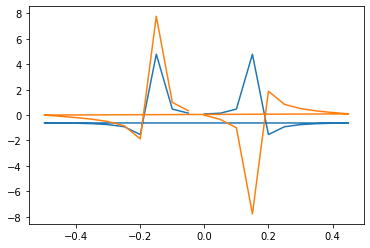

In [57]:
import matplotlib.pyplot as plt
t = np.arange(256)
t = t[:20]
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [58]:
plot([go.Scatter(x=freq, y=sp.real)])
#plot([go.Scatter(x=freq, y=sp.imag)])
#plot([go.Scatter(y=np.sin(t))])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [59]:
plot([go.Scatter(y=np.sin(t))])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [63]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')

/home/guo/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



# load ecg



In [16]:
import fs
from fs import load_ecg

In [17]:
ecg = load_ecg(edf_path)

In [18]:
plot([go.Scatter(y=ecg)])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [41]:
fs = 500
#secs = 120

start = 1000000
#start = 0
end = start + 5000000

plot([#go.Scatter(y=fiber[start:end],name="raw fiber"),
    go.Scatter(y=detrend_linear(lowpass_filter(fiber)[start:end]),name="lowpass"),
     go.Scatter(y=-abd[start:end], name="psg abdomen")])

/home/guo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:2383: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [20]:
import filter
from filter import bandpass_filter, notch_filter, lowpass_filter, bandpass_filter2, highpass_filter
from scipy.signal import detrend

In [30]:
heart = bandpass_filter(notch_filter(fiber))

In [31]:
ecg = edf.signals['ECG LL-RA']
ecg = notch_filter(ecg)

In [34]:
start = 1000000
end = start + 500000
plot([go.Scatter(y=heart[start:end]), go.Scatter(y=ecg[start:end]*10)])
#plot([go.Scatter(y=heart[start:end])])

'temp-plot.html'

In [16]:
signal = medfilt(bandpass_filter2(notch_filter(fiber)), kernel_size=35)
plot([go.Scatter(y=signal[start:end])])

'temp-plot.html'

In [38]:
from scipy.signal import medfilt, resample_poly

In [44]:
abdomen = edf.signals['Resp abdomen']
abd = resample_poly(abdomen, 5,1)
abd = notch_filter(abd)*10
plot([go.Scatter(y=lowpass_filter(notch_filter(fiber))),
     go.Scatter(y=abd, name="abdomen")])

'temp-plot.html'

### PSG from Desktop

In [5]:
fiber_path="/home/guo/physio/BCG_data/fiber/2019-06-25/HeadElectricDiagram_6_B3012758.dat"
import pdb

In [11]:
with open(fiber_path, 'rb') as file:
    raw = file.read()
    print(raw[:10])
    print(raw[:3])
    raw = raw[3:]
    #pdb.set_trace()
    signal_raws = raw.decode('utf-8').split()
    signal = list(map(float, map(lambda x:x.strip(), signal_raws)))

b'\xef\xbb\xbf4499691'
b'\xef\xbb\xbf'


In [12]:
plot([go.Scatter(y=signal[:100000])])

'file:///home/guo/Github/BCGHeart/optical_fiber/temp-plot.html'

In [13]:
fiber = signal